| ⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀ | ⠀ | ⠀ | ⠀ | ⠀ |
| - | - | - | - | - |
| ⠀ | <a href="https://mipt.ru/education/chair/theoretical_mechanics/courses/haos-i-kotiki.php">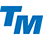</a> | <a href="https://t.me/miptdesign">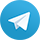</a> | <a href="mailto: efimov.ss@phystech.edu">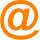</a> | <a href="https://github.com/Eltaurus-Lt/CnC">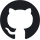</a> |

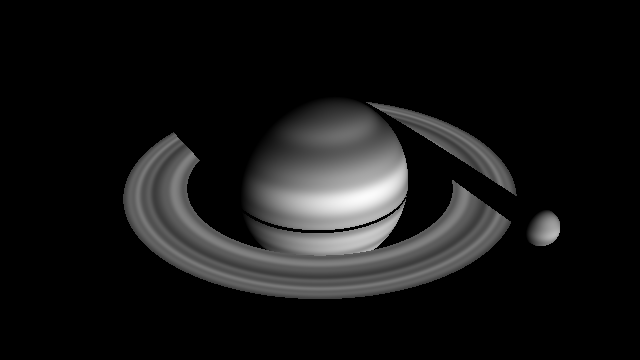

In [46]:
width,height=640,360 # Image resolution
fov=40 # Horizontal field of view, deg

import numpy as np
from numpy import array as v
from numpy.linalg import norm
from math import tan,sin,cos
from scipy import interpolate
from scipy.spatial.transform import Rotation as R
import random
from PIL import Image

deg=np.pi/180
fw=tan(fov*deg/2)
fh=fw*height/width

# Texture generation
random.seed(2)
xs= [i/12-1 for i in range(50)]
ys= [1+random.random() for i in range(50)]
splines = interpolate.splrep(xs,ys)
def tex(vx):
    return interpolate.splev(vx,splines)

# normilization of a vector
def normalize(vec):
    return v(vec)/norm(vec)

# Main method - calculates brightness and distance to the closest surface point in the direction n of a ray released from origin o
def TraceRay(o,n,sd=True):
        
    spheres=[[[0,0,0],1],[[2,1.5,0],.2]] # spheres' parameters
    c2,r2,R2,n2=[0,0,0],1.5,2.2,[0,0,1] # rings' parameters
    l=[cos(3*deg),0,sin(3*deg)] # direction to the Sun
    
    o,n =v(o),v(n) 
    col,dist,e=0,999,.001
    
    # intersection of the ray with the spheres
    for sp in spheres:
        oc=sp[0]-o
        a=norm(np.cross(oc,n)) #impact parameter
        if a<sp[1]:
            ds=np.dot(oc,n)+np.sqrt(sp[1]**2-a**2)*v([-1,1]) # distances from the ray origin to two points of intersection
            for d in ds:
                if e<d<dist:
                    p=o+n*d # radius-vector of a point of intersection
                    if not sd:
                        col=0 # shading not required (function called recursively)
                    elif TraceRay(p,l,False)[1]==999: # recursive call to check if the point is in the light
                        col=0.5*np.dot(l,normalize(p-sp[0]))*tex(p[2]) # calculate color: base_brightness * lambert_shading * texture
                    else:
                        col=0 # the point is in the shadow
                    dist=d # update distance to the closest point
                
    # intersection of the ray with the ring            
    a=np.dot(n,n2) # cos of incidence angle
    if abs(a)>e: # exclude if plane of the rings is parallel to the ray
        d=np.dot(-o+c2,n2)/a # distance from the ray origin to the point of intersection
        p=o+n*d # radius-vector of the point of intersection
        if e<d<dist and r2<norm(p-c2)<R2: # check if the intersection is ahead of the ray direction and within the ring boundaries
            if not sd:
                col=0 # shading not required (function called recursively)
            elif TraceRay(p,l,False)[1]==999: # recursive call to check if the point is in the light
                col=0.25*tex(2*norm(p)-3)  # calculate color: ambient_brightness * texture
            else:
                col=0 # the point is in the shadow
            dist=d # update distance to the closest point
             
    return [col,dist]

# camera rotation matrix
M=v([[cos(60*deg), -sin(60*deg),0],[sin(60*deg),cos(60*deg),0],[0,0,1]]) @ [[1,0,0],[0,cos(60*deg), -sin(60*deg)],[0,sin(60*deg),cos(60*deg)]]
CR=R.from_rotvec(60*deg*v([0, 0, 1])).__mul__(R.from_rotvec(60*deg*v([1, 0, 0])))
# tracing a ray for each pixel
pixels=[[TraceRay(CR.apply([0,0,10]),CR.apply(normalize([xcomp,ycomp,-1])))[0] for xcomp in np.linspace(-fw,fw,width)] for ycomp in np.linspace(fh,-fh,height)]

# making and displaying the final image
img=Image.fromarray(v(255*v(pixels), dtype=np.uint8))
display(img)

In [ ]:
# texture plot
import matplotlib.pyplot as plot
px=np.linspace(-1,3,250)
plot.plot(xs,ys,px,[tex(pv) for pv in px])
plot.show()